# 1.Predicting Used Car Resale Value through Linear Regression
##### Nhi Cao - 300 367 933
##### Amrit Sian 
##### Huy Thuy Dung Nguyen

# 2. Library import and data loading

In [1]:
import pandas as pd
# read the CSV file into a DataFrame
df = pd.read_csv("unclean_data.csv")

# 3. Data Analysis, Preparation and Wrangling

## 3.1 Handling missing rows

In [2]:
df = df.dropna(how='all')
# Re-index the dataframe
df = df.reset_index(drop=True)
df.head(30)

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
5,C Class,2020.0,"£30,999",Automatic,NaN,Diesel,2,"1,000",NaN,NaN,/ad/25059312
6,C Class,2020.0,"£35,999",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25418851
7,C Class,2019.0,"£37,990",Automatic,NaN,Petrol,3,"1,412",NaN,NaN,/ad/25449314
8,C Class,2019.0,"£28,990",Automatic,NaN,Diesel,2,"3,569",NaN,NaN,/ad/25046820
9,C Class,2019.0,"£28,990",Automatic,NaN,Diesel,2,"3,635",NaN,NaN,/ad/25046821


## 3.2 Handling the currency symbols and comma format &
## 3.3 Handling non-valid column names


In [3]:
df['price'] = df['price'].apply(lambda x: x.replace('£','').replace(',',''))

df.rename(columns={
    "fuel type": "fuel_type",
    "fuel type2": "fuel_type2",
    "engine size": "engine_size",
    "engine size2": "engine_size2"}, inplace=True)

df

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


## 3.4 Handling missing values in columns: fuel_type


In [4]:
df.fuel_type2.fillna(df.fuel_type, inplace=True)
df.drop(columns=['fuel_type'], inplace=True)
df.rename(columns={'fuel_type2': 'fuel_type'}, inplace=True)

df

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",£145,56.5,Diesel,2.143,/ad/25144481


## 3.5 Handling missing values and comma format in columns: mileage

In [5]:
df.mileage.fillna(df.mileage2, inplace=True)

# Removing comma 
df['mileage'] = df['mileage'].apply(lambda x: x.replace(',',''))
#print(df['mileage'].dtype)


# Converting mileage column to numeric
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
#print(df['mileage'].dtype)


df.drop(columns=['mileage2'], inplace=True)

df


,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,£150,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,£150,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,£20,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,£145,Diesel,2.143,/ad/25144481


## 3.6 Handling missing values and different value standard in columns: engine_size


In [6]:
# Fill missing values in engine_size2 with values from engine_size
df.engine_size2.fillna(df.engine_size, inplace=True)


# Convert engine_size2 to numeric and standardize the values
df['engine_size2'] = pd.to_numeric(df['engine_size2'], errors='coerce')
df['engine_size2'] = df['engine_size2'].apply(lambda x: round(x/1000,1) if x>1000 else round(x,1))

# Drop engine_size column and rename engine_size2 as engine_size
df = df.drop(columns=['engine_size'])
df = df.rename(columns={'engine_size2': 'engine_size'})

df


,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


## 3.7 Handling wrong data type: year

In [7]:
df.dropna(inplace=True)
df['year']= df['year'].astype('int64')


df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


## 3.8 Handling unneeded columns

In [8]:
df.drop(columns=['model', 'reference'], inplace=True)

df

,year,price,transmission,mileage,fuel_type,engine_size
0,2020,30495,Automatic,1200.0,Diesel,2.0
1,2020,29989,Automatic,1000.0,Petrol,1.5
2,2020,37899,Automatic,500.0,Diesel,2.0
3,2019,30399,Automatic,5000.0,Diesel,2.0
4,2019,29899,Automatic,4500.0,Diesel,2.0
...,...,...,...,...,...,...
3902,2017,14700,Manual,31357.0,Diesel,1.6
3903,2018,18500,Automatic,28248.0,Diesel,2.1
3904,2014,11900,Manual,48055.0,Diesel,2.1
3905,2014,11300,Automatic,49865.0,Diesel,2.1


## 3.9 Handling categorical data

In [9]:
# Get dummy values for transmission
transmission = pd.get_dummies(df['transmission'])
transmission = transmission.rename(columns={'Other': 'OtherTransmission'})


# Join the dummy values to the dataframe
df = df.join(transmission)

# Get dummy values for fuel_type
fuels = pd.get_dummies(df['fuel_type'])

# Rename the 'Other' column to avoid confusion
fuels = fuels.rename(columns={'Other': 'OtherFuel'})

# Join the dummy values to the dataframe
df = df.join(fuels)

# Drop the original transmission and fuel_type columns
df.drop(['transmission', 'fuel_type'], axis=1, inplace=True)

df

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3903,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3904,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3905,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


## 3.10 Saving the cleaned data into csv

In [10]:
# Converting price column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Re-index the dataframe
df.reset_index(drop=True, inplace=True)

df.to_csv("cleaned_data.csv")
print(df.info())
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3898 non-null   int64  
 1   price              3898 non-null   int64  
 2   mileage            3898 non-null   float64
 3   engine_size        3898 non-null   float64
 4   Automatic          3898 non-null   uint8  
 5   Manual             3898 non-null   uint8  
 6   OtherTransmission  3898 non-null   uint8  
 7   Semi-Auto          3898 non-null   uint8  
 8   Diesel             3898 non-null   uint8  
 9   Hybrid             3898 non-null   uint8  
 10  OtherFuel          3898 non-null   uint8  
 11  Petrol             3898 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 152.4 KB
None


,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# import cleaned_data.csv that prof Ivan Wong provided for comparison purpose
df5 = pd.read_csv("cleaned_data_Ivan.csv")
df5.describe()

,Unnamed: 0,year,mileage,engineSize,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol,price
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,1949.000000,2017.338548,22395.709156,2.037394,0.417543,0.051039,0.000256,0.531162,0.600154,0.038728,0.001539,0.359579,23674.286997
std,1125.688678,2.213416,22630.438426,0.487769,0.493217,0.220105,0.016015,0.499092,0.489929,0.192970,0.039203,0.479939,8960.218218
min,0.000000,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1290.000000
25%,974.500000,2016.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17690.000000
50%,1949.000000,2018.000000,14640.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,22980.000000
75%,2923.500000,2019.000000,32458.500000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,28900.000000
max,3898.000000,2020.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,88995.000000


In [12]:
#try to find the row that my dataframe is missing
missing_price = df5[~df5.price.isin(df.price)]
print(missing_price)

#turns out that that row is not even included in the original unclean_data.csv, 
#so we will ignore it and carry on with our cleaned df. 



      Unnamed: 0  year  mileage  engineSize  Automatic  Manual  \
3612        3612  2005   110461         2.1          1       0   

      OtherTransmission  Semi-Auto  Diesel  Hybrid  OtherFuel  Petrol  price  
3612                  0          0       1       0          0       0   2495  


#  


# 4. Exploratory Data Analysis and Visualization

## Getting the libraries and data


In [13]:
# Import libraries necessary for this project
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#so that the plot will be saved within the jupyter notebook

df

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


## Analyze the data
We first get some summary statistics of the data

In [14]:
df.describe()

,year,price,mileage,engine_size,Automatic,Manual,OtherTransmission,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We then create histograms to see the distribution of the data and check if the data is normally distributed or skewed in any direction.

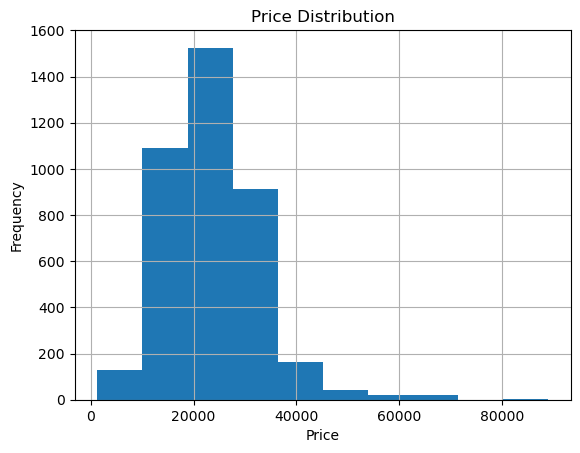

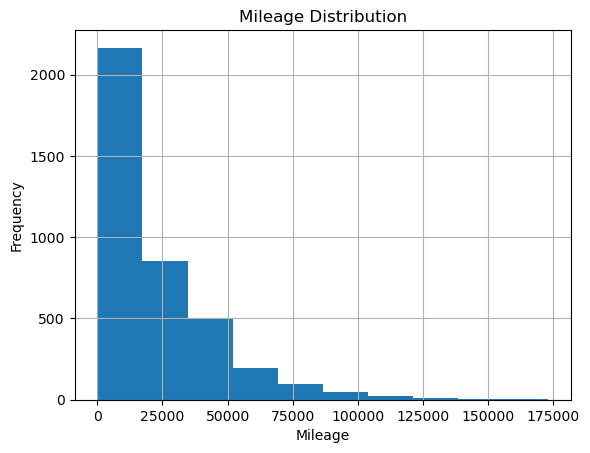

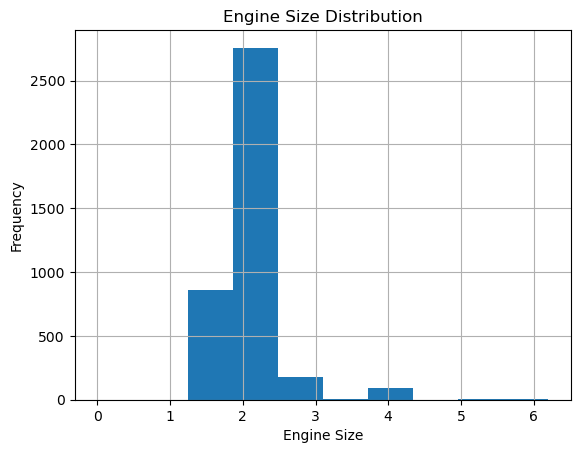

In [15]:

# Plot histograms for price, mileage, and engine size columns
df['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

df['mileage'].hist()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Mileage Distribution')
plt.show()

df['engine_size'].hist()
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.title('Engine Size Distribution')
plt.show()


For Price, it looks normally distributed. We might need to drop some outliers >50 000
Milage right-skewed. Might drop above >70k milage

# 5. Feature Observation and Hypothesis

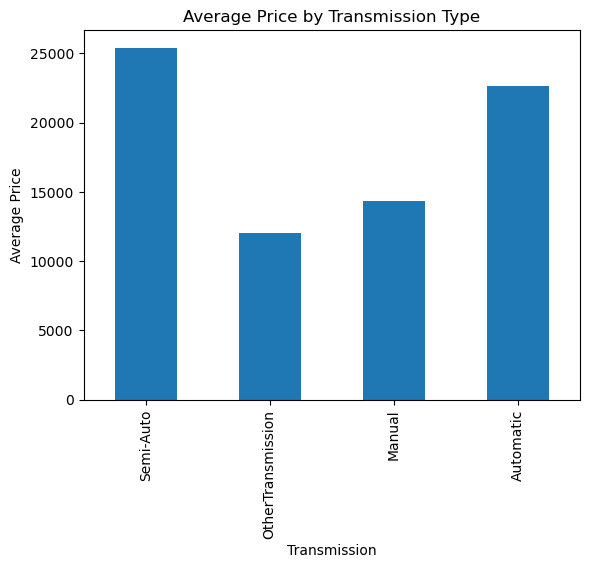

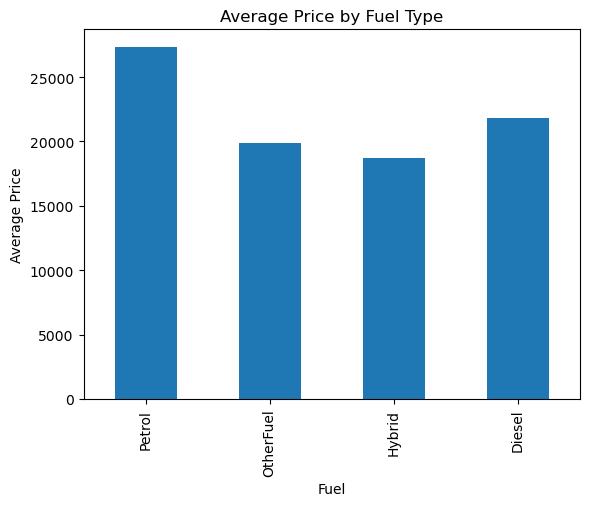

In [16]:
# Calculate the average price for each transmission type
transmission_avg_price = df.groupby(['Automatic', 'Manual', 'OtherTransmission', 'Semi-Auto']).mean()['price']

# Create a dictionary that maps the binary labels to category names
transmission_labels = {
    (0, 0, 0, 1): 'Semi-Auto',
    (0, 0, 1, 0): 'OtherTransmission',
    (0, 1, 0, 0): 'Manual',
    (1, 0, 0, 0): 'Automatic'
}

# Replace the binary labels with their corresponding category names
transmission_avg_price.index = transmission_avg_price.index.map(transmission_labels)

# Plot the average price for each transmission type
transmission_avg_price.plot(kind='bar')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.title('Average Price by Transmission Type')
plt.show()


fuel_avg_price = df.groupby(['Diesel', 'Hybrid', 'OtherFuel', 'Petrol']).mean()['price']

fuel_labels = {
    (0, 0, 0, 1): 'Petrol',
    (0, 0, 1, 0): 'OtherFuel',
    (0, 1, 0, 0): 'Hybrid',
    (1, 0, 0, 0): 'Diesel'
}

fuel_avg_price.index = fuel_avg_price.index.map(fuel_labels)

fuel_avg_price.plot(kind='bar')
plt.xlabel('Fuel')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type')
plt.show()

Couldn't the draw the insights from these graphs. Most cars are auto or semi auto so this fits into this comoon snese 

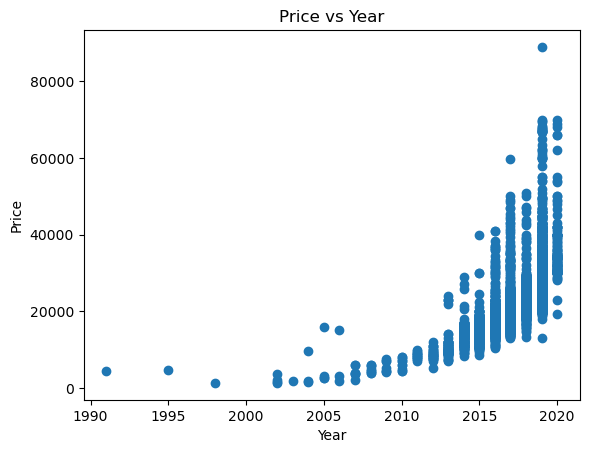

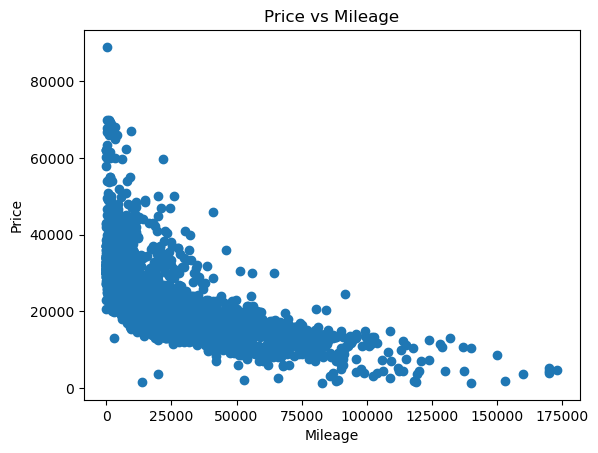

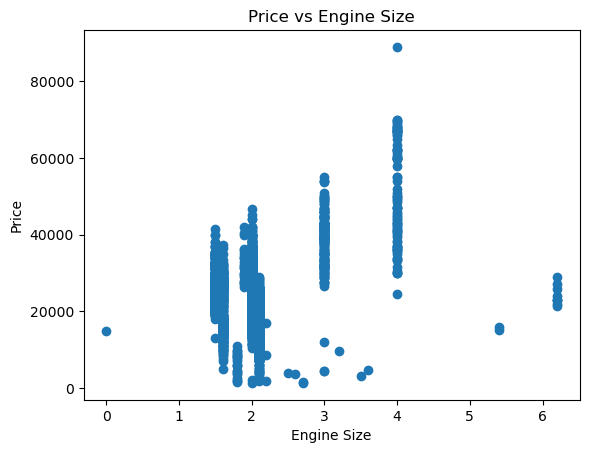

In [17]:
#Create a scatter plot between price and year
plt.scatter(df.year, df.price)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
plt.show()

#Create a scatter plot between price and mileage
plt.scatter(df.mileage, df.price)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Mileage')
plt.show()

#Create a scatter plot between price and engine_size
plt.scatter(df.engine_size, df.price)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Price vs Engine Size')
plt.show()

The newer the car the higher the resale value.
The more milage the car has the lower the resale value.
Engine size does not really affect the price.


Data insights

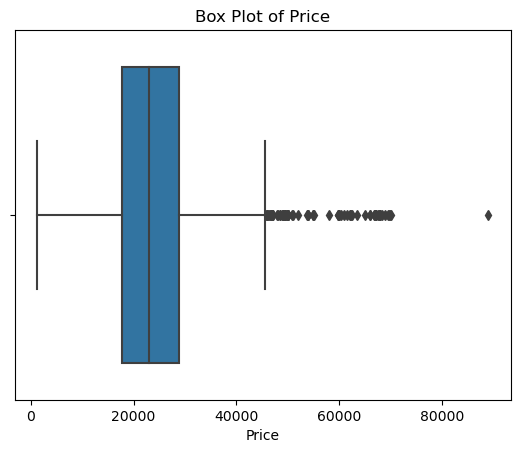

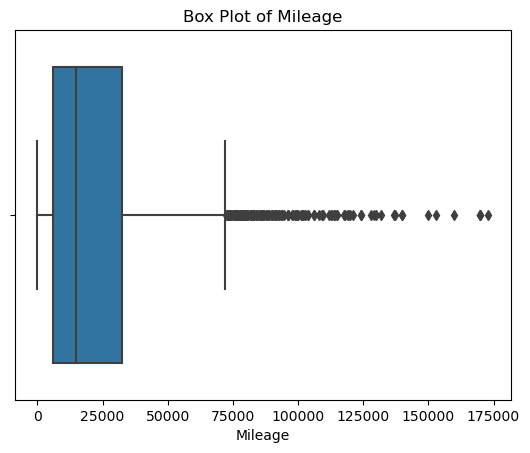

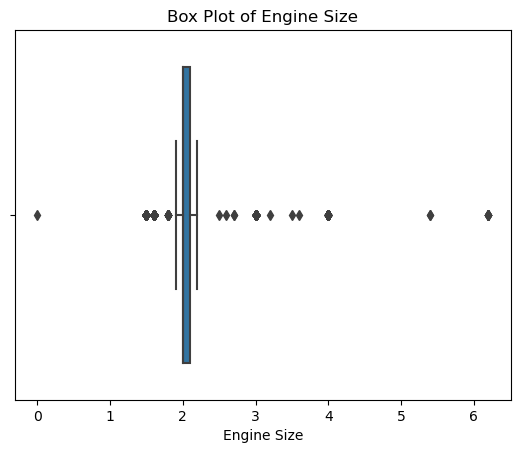

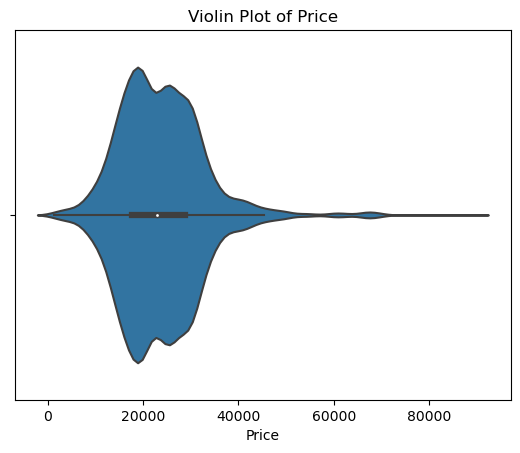

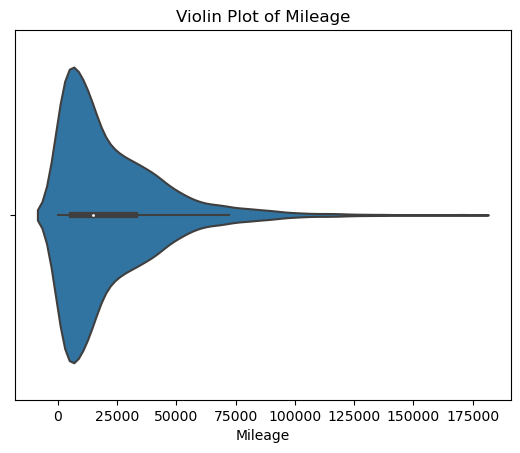

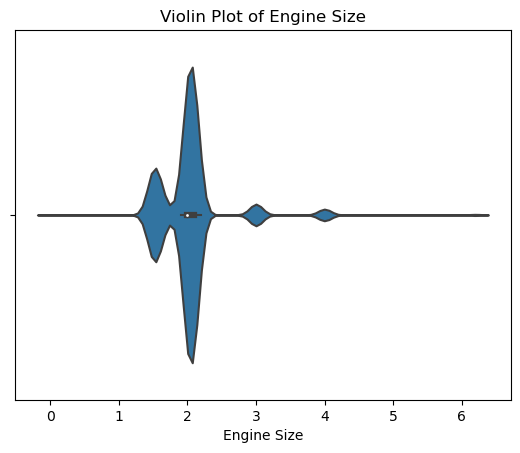

In [18]:
# Create box plots to visualize the distribution of the data
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

sns.boxplot(x=df['mileage'])
plt.xlabel('Mileage')
plt.title('Box Plot of Mileage')
plt.show()

sns.boxplot(x=df['engine_size'])
plt.xlabel('Engine Size')
plt.title('Box Plot of Engine Size')
plt.show()

# Create violin plots to visualize the distribution of the data in more detail
sns.violinplot(x=df['price'])
plt.xlabel('Price')
plt.title('Violin Plot of Price')
plt.show()

sns.violinplot(x=df['mileage'])
plt.xlabel('Mileage')
plt.title('Violin Plot of Mileage')
plt.show()

sns.violinplot(x=df['engine_size'])
plt.xlabel('Engine Size')
plt.title('Violin Plot of Engine Size')
plt.show()


In [19]:
#sns.pairplot(df, height=2.5)
#plt.tight_layout()

In [20]:
# Calculate the correlation matrix
corr = df.corr()

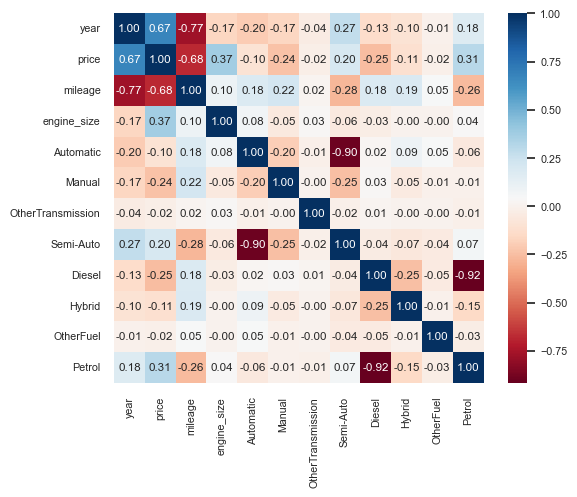

mileage             -0.679101
Diesel              -0.254683
Manual              -0.241093
Hybrid              -0.112066
Automatic           -0.098206
OtherTransmission   -0.020905
OtherFuel           -0.016542
Semi-Auto            0.204057
Petrol               0.306394
engine_size          0.373003
year                 0.674218
price                1.000000
Name: price, dtype: float64


In [21]:
# Calculate and show correlation matrix
cm = np.corrcoef(df.values.T)
sns.set(font_scale=.7)
hm = sns.heatmap(cm,cmap='RdBu',
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                yticklabels=df.columns,
                xticklabels=df.columns)
plt.show()

# Get the correlation between the features and the target variable (price)
corr_with_price = corr['price'].sort_values()

# Print the features with high correlation with the target variable
print(corr_with_price)


## Split the dataset into training and test sets
We will split 80:20 and using randomstate=42 to make a repeatable result. 
You may want to shuffle the data as well

## Training and Testing

## Calculate the performance metric

Root Mean Squared Error: 6746.002173382985
R-squared: 0.49670175133406436


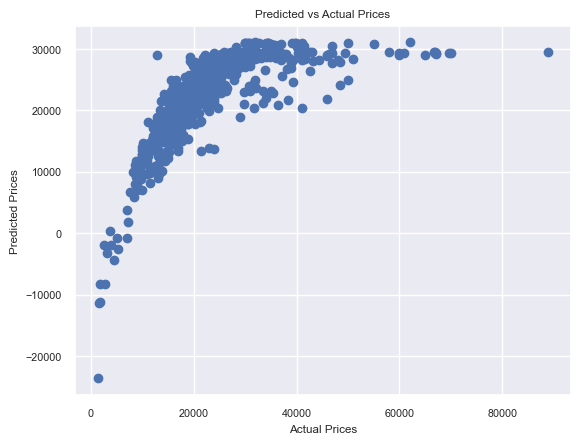

Intercept: -3077531.6642488646
Coefficients: [ 1.53890807e+03 -1.49044835e-01]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Select the year and mileage features and the price response
X = df[['year', 'mileage']]
Y = df['price']

#Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

#Fit a linear regression model to the training data
reg = LinearRegression().fit(X_train, Y_train)

#Make predictions on the test data
Y_pred = reg.predict(X_test)

#Calculate the root mean squared error and the R-squared metric
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

#Plot the predicted vs actual values
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

#Print the model coefficients
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)


# 
# 
# 
# Part B. Competition

In [23]:
# read the CSV file into a DataFrame
dfB= pd.read_csv('competition_data.csv')
dfB


,Unnamed: 0,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,0,2020.0,30495,1200.0,2.000,1,0,0,0,1,0,0,0
1,1,2020.0,29989,1000.0,1.500,1,0,0,0,0,0,0,1
2,2,2020.0,37899,500.0,2.000,1,0,0,0,1,0,0,0
3,3,2019.0,30399,5000.0,2.000,1,0,0,0,1,0,0,0
4,4,2019.0,29899,4500.0,2.000,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892,4001,2017.0,14700,31357.0,1.598,0,1,0,0,1,0,0,0
3893,4002,2018.0,18500,28248.0,2.143,1,0,0,0,1,0,0,0
3894,4003,2014.0,11900,48055.0,2.143,0,1,0,0,1,0,0,0
3895,4004,2014.0,11300,49865.0,2.143,1,0,0,0,1,0,0,0


In [28]:

dfB.describe()

,Unnamed: 0,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,2034.650244,2017.341288,23662.959969,22378.806518,246.505733,0.417501,0.051065,0.000257,0.531178,0.600205,0.038748,0.001540,0.359507
std,1132.652845,2.204979,8894.733784,22589.428526,703.211619,0.493210,0.220158,0.016019,0.499091,0.489919,0.193018,0.039213,0.479918
min,0.000000,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1058.000000,2016.000000,17690.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2032.000000,2018.000000,22980.000000,14640.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3009.000000,2019.000000,28900.000000,32442.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,4005.000000,2020.000000,69995.000000,173000.000000,6208.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


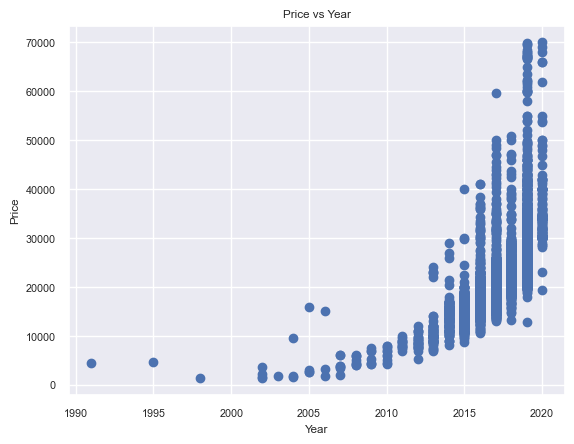

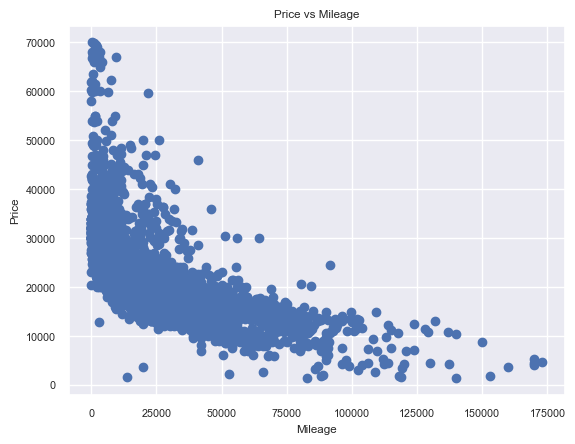

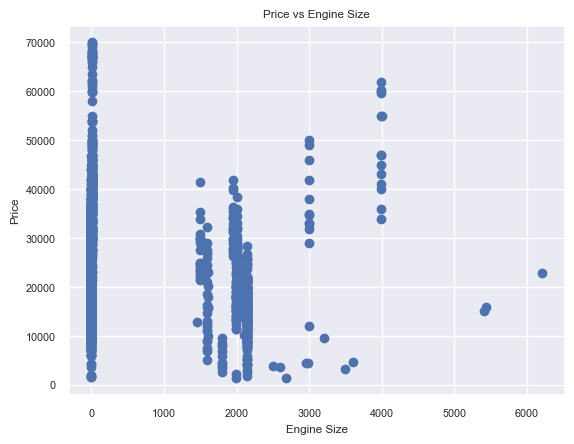

In [25]:
#Create a scatter plot between price and year
plt.scatter(dfB.year, dfB.price)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
plt.show()

#Create a scatter plot between price and mileage
plt.scatter(dfB.mileage, dfB.price)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Mileage')
plt.show()

#Create a scatter plot between price and engine_size
plt.scatter(dfB.engine_size, dfB.price)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Price vs Engine Size')
plt.show()

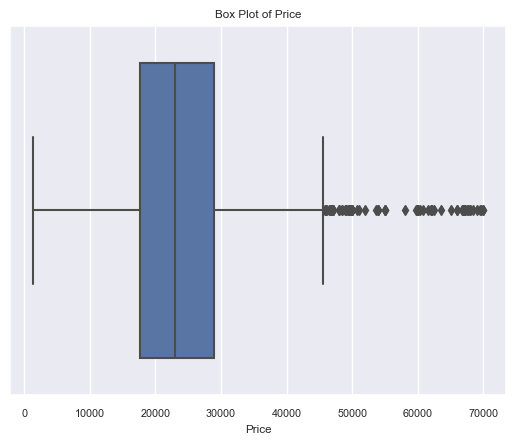

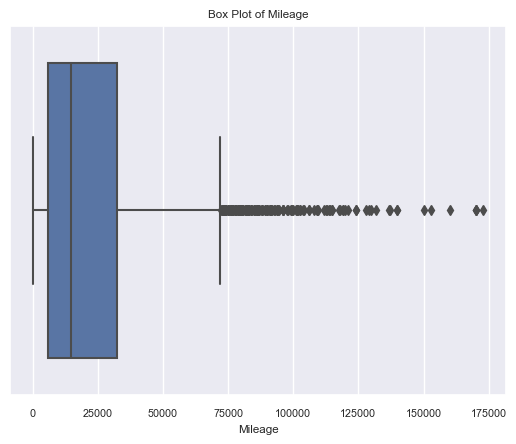

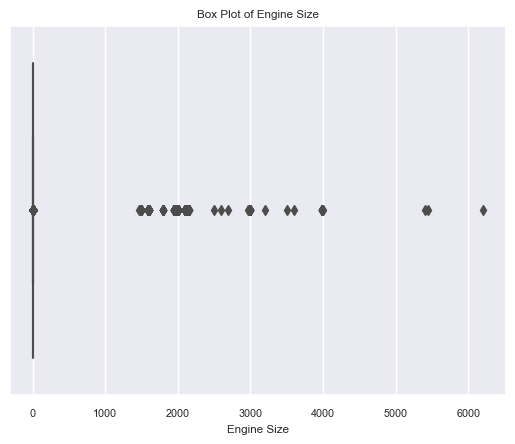

In [26]:
# Create box plots to visualize the distribution of the data
sns.boxplot(x=dfB['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

sns.boxplot(x=dfB['mileage'])
plt.xlabel('Mileage')
plt.title('Box Plot of Mileage')
plt.show()

sns.boxplot(x=dfB['engine_size'])
plt.xlabel('Engine Size')
plt.title('Box Plot of Engine Size')
plt.show()